In [136]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

plt.rcParams['font.size'] = 15
plt.rcParams['font.weight'] ='bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 15

# Nonequilibrium Dynamics: Oscillation 
## Modeling Life, chapter 4
IBM3101 - Francisco Sahli

**Example:** body temperature oscillations

![alt text](Ch4Images/body_temperature.png)

An **attractor** of a dynamical system on the state space $X$ is a set $A$ contained in $X$ such that for a neighborhood of initial conditions $X_0$, the trajectories going forward from $X_0$ all approach $A$, that is, the distance $d$

$d(X(t),A) \rightarrow 0$ as $t \rightarrow \infty$

What examples of attractors did we learned on Chapter 3?

## Example

Model of population with crowding: $X' = bX - \frac{b}{k}X^2$

(0.0, 1.0)

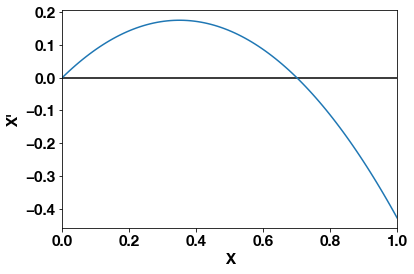

In [137]:
b = 1.
k = 0.7

def Xp(X, t, b, k):
    return b*X - b*X**2/k


X = np.linspace(0, 1, 100)
plt.plot(X, Xp(X,0, b, k))
plt.hlines([0.0], X[0], X[-1])
plt.xlabel('X')
plt.ylabel('X\'')
plt.xlim((X[0], X[-1]))

Shows 2 equilibrium points, one unstable (X = 0) and one stable (X = k).


How large is the attraction neighborhood of X = k?

Text(0, 0.5, 'X')

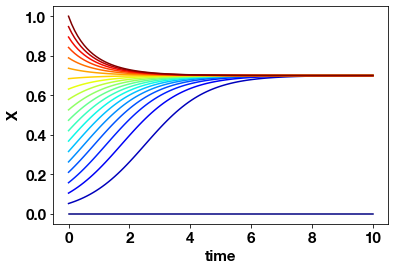

In [138]:
t = np.linspace(0, 10, 100)
X0s =  np.linspace(0,1, 20)

cm = plt.cm.jet

for X0 in X0s:

    Xsol = odeint(Xp, [X0], t, args = (b, k))

    plt.plot(t, Xsol, color = cm(X0))

plt.xlabel('time')
plt.ylabel('X')

The simplest attractor is a point. “**Point attractor**” is another name for “**stable equilibrium point**”, and it is a model for equilibrium control of systems. 

1) If X is a state variable, the function X(t) is an oscillation if and only if it is periodic; that is, if there is a constant P (called the period of the oscillation) such that for all times t, X(t + P) = X(t). In other words, the function X(t) repeats itself after P time units. 
2) In state space, a trajectory represents an oscillation if and only if it is a closed loop, which is often referred to as a closed orbit. 

## Rayleigh’s Clarinet: A Stable Oscillation

![alt text](Ch4Images/clarinet.png)

With linear friction:
$$X' = V$$
$$V' = -X + cV$$
Where $c$ is -1 for negative friction, 1 for positive friction and 0 for no friction

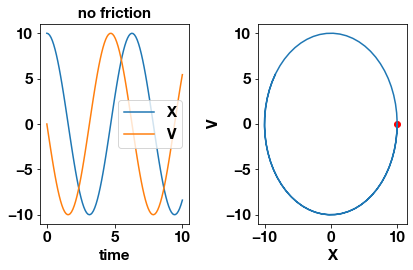

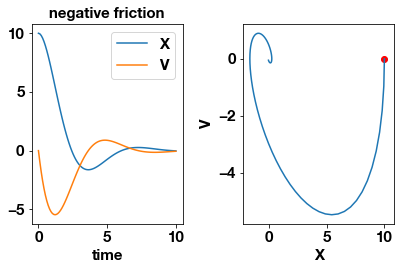

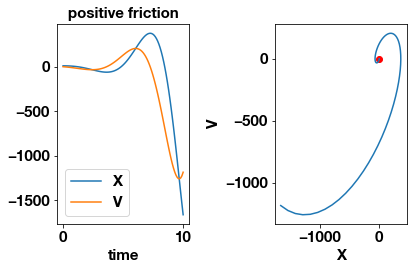

In [140]:
def linearclarinet(Y, t, d):
    X, V = Y
    Xp = V
    Vp = -X + d*V
    return [Xp, Vp]

X0 = [10, 0.0]
cs = [0, -1, 1]
titles = ['no friction', 'negative friction', 'positive friction']
t = np.linspace(0, 10, 100)


for c, title in zip(cs, titles):
    Xsol = odeint(linearclarinet, X0, t, args = (c,))

    plt.figure()
    plt.subplot(121)
    plt.plot(t, Xsol[:,0], label = 'X')
    plt.plot(t, Xsol[:,1], label = 'V')
    plt.legend()
    plt.title(title)
    plt.xlabel('time')
    plt.subplot(122)
    plt.plot(Xsol[:,0], Xsol[:,1])
    plt.scatter([X0[0]], [X0[1]], color = 'red')
    plt.xlabel('X')
    plt.ylabel('V')
    
    plt.tight_layout()

With non-linear friction:
$$X' = V$$
$$V' = -X - (aV^3 - V)$$

(-1.2, 1.2)

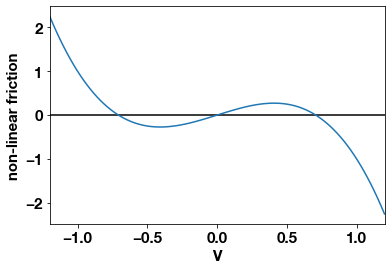

In [141]:
def nonlinearclarinet(Y, t, a):
    X, V = Y
    Xp = V
    Vp = - X - (a*V**3 - V)
    return [Xp, Vp]

a = 2
V = np.linspace(-1.2, 1.2, 100)

plt.plot(V, -(a*V**3 - V))
plt.hlines(0, V[0], V[-1])
plt.xlabel('V')
plt.ylabel('non-linear friction')
plt.xlim([V[0],V[-1]])

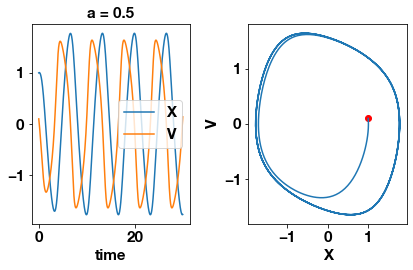

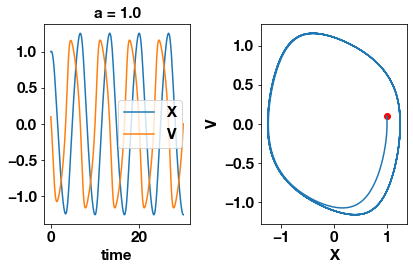

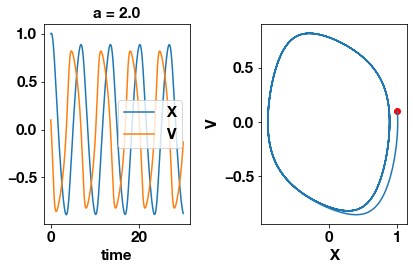

In [142]:
X0 = [1.0, 0.1]
As = [0.5, 1.0, 2.0]

t = np.linspace(0, 30, 1000)


for a in As:
    Xsol = odeint(nonlinearclarinet, X0, t, args = (a,))

    plt.figure()
    plt.subplot(121)
    plt.plot(t, Xsol[:,0], label = 'X')
    plt.plot(t, Xsol[:,1], label = 'V')
    plt.legend()
    plt.title('a = %.1f' % a)
    plt.xlabel('time')
    plt.subplot(122)
    plt.plot(Xsol[:,0], Xsol[:,1])
    plt.scatter([X0[0]], [X0[1]], color = 'red')
    plt.xlabel('X')
    plt.ylabel('V')
    plt.tight_layout()

- check what happens if you perturb the initial conditions in the linear clarinet and in the nonlinear clarinet

A **periodic attractor** is an attractor that is a closed orbit, also called a stable limit cycle, or limit cycle attractor. 

# 4.2 Mechanisms of oscillation

There are two main mechanism for oscillation:
- steep negative feedback
- time delays

## The Hypothalamic/Pituitary/Gonadal Hormonal Axis
Example of steep negative feedback
![alt text](Ch4Images/HPG.png)

Simplified model, with $H$ production in the hypothalamus, $P$ production in the pituitary gland and $G$ production in the gonads
$$\begin{eqnarray}
H' &=& \frac{1}{1 + G^n} - k_1H\\
P' &=& H - k_2P\\
G' &=& P -k_3G
\end{eqnarray}$$

We can tune how steep is the feedback between from $G$ to $H$ with the parameter $n$:

Text(0, 0.5, 'feedback')

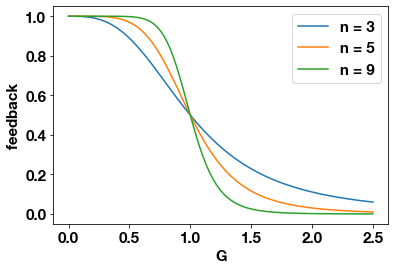

In [144]:
G = np.linspace(0, 2.5, 100)

ns = [3, 5, 9]

for n in ns:
    feedback = 1/(1 + G**n)
    plt.plot(G, feedback, label = "n = %d" % n)
    
plt.legend()
plt.xlabel('G')
plt.ylabel('feedback')

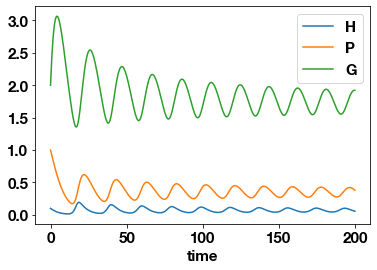

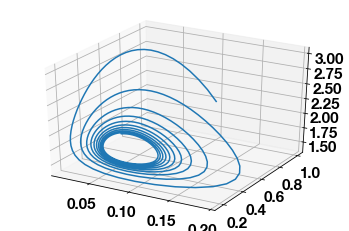

In [145]:
def HPG(X, t, n, k1, k2, k3):
    H, P, G = X
    Hp = 1/(1 + G**n) - k1*H
    Pp = H - k2*P
    Gp = P - k3*G
    return [Hp, Pp, Gp]
    
    
k1 = k2 = k3 = 0.2
n = 8
X0 = [0.1, 1, 2]
t = np.linspace(0, 200, 500)

Xsol = odeint(HPG, X0, t, args = (n, k1, k2, k3))

Hsol = Xsol[:,0]
Psol = Xsol[:,1]
Gsol = Xsol[:,2]

plt.plot(t, Hsol, label = 'H')
plt.plot(t, Psol, label = 'P')
plt.plot(t, Gsol, label = 'G')
plt.xlabel('time')
plt.legend()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(Hsol, Psol, Gsol)


- What do you think will happen if you decrease the parameter $n$? 
- Change the initial conditions to verify that they all approach the limit cycle attractor


## Respiratory control of CO$_2$
Example of oscillations due to time delays and steep negative feedback

X' = body metabolism - ventilation, where X is CO$_2$ concentration

X' = L - VX, where V is the ventilation rate

$$ V = V_{max}\frac{X(t - \tau)^n}{1 + X(t - \tau)^n} $$

There is a time delay $\tau$ between the CO$_2$ concentration sensed in the brain and current CO$_2$ concentration in the lungs.

This is an example of delay differential equations, we can't use `odeint`


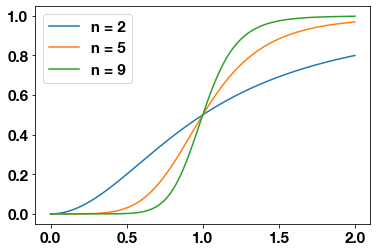

In [146]:
X = np.linspace(0, 2, 500)
ns = [2, 5, 9]

for n in ns:
    feedback = X**n/(1 + X**n)
    plt.plot(X, feedback, label = "n = %d" % n)
    
plt.legend()

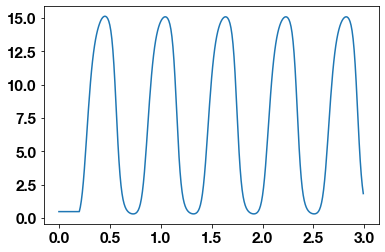

In [147]:
dt = 0.01
tau = 0.2
itau = int(tau/dt) + 1 # number of steps that I need to look back
Xsol = [0.5]*itau
Vsol = []
t = [0]

final_time = 3
n_steps = int(final_time/dt)

Vmax = 16
n = 5
L = 6
# euler's method to integrate the system
for i in range(n_steps):
    V = Vmax*Xsol[-itau]**n/(1 + Xsol[-itau]**n)
    Vsol.append(V)
    t.append(t[-1] + dt)
    Xp = L - V*Xsol[-1]
    Xsol.append(Xsol[-1] + dt*Xp)
    
plt.plot(t[:-1], Vsol)


- if we want to make the ventilation pattern stable, what parameters we need to change and what do they mean?
- what are the limitations of the current implementation?

## Oscillations in Insulin and Glucose

Example of time delays

Insulin (I) is changed by:
- is increased when glucose (G) is increased in a saturating manner (with a certain delay $\tau$
- is decreased by its degradation

Glucose (G) is changed by:
- increased by external sources, such as meals
- increased by glucouse production of the liver, which inhibited by insulin (I)
- is decreased by its degradation
- is decreased when combined with I in the muscle to metabolize G

Then:
$$\begin{eqnarray}
I' &=& \frac{k_1G(t - \tau)^4}{1 + G(t - \tau)^4} - k_2I\\
G' &=& {\rm ext} + \frac{k_3}{1 + I^2} - k_4G - GI
\end{eqnarray}$$

Text(0, 0.5, 'glucose')

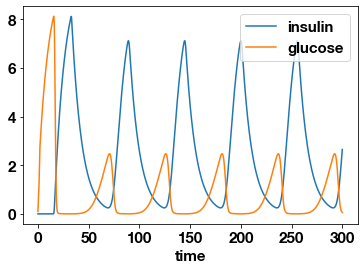

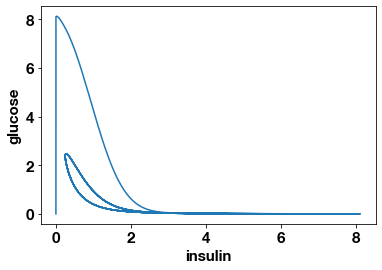

In [148]:
k1 = 1
k2 = 0.1
k3 = 1
k4 = 0.1

def ext(t):
    return 1.0*(1 < t < 2)



dt = .1
tau = 15.0
itau = int(tau/dt) + 1 # number of steps that I need to look back
Isol = [0.0]*itau
Gsol = [0.0]*itau

t = [0]

final_time = 300
n_steps = int(final_time/dt)



# euler's method to integrate the system
for i in range(n_steps):
    Ip = k1*Gsol[-itau]**4/(1 + Gsol[-itau]**4) - k2*Isol[-1]
    Isol.append(Isol[-1] + dt*Ip)
    
    Gp = ext(t[-1]) + k3/(1 + Isol[-1]**2) - k4*Gsol[-1] - Gsol[-1]*Isol[-1]
    Gsol.append(Gsol[-1] + dt*Gp)
    t.append(t[-1] + dt)

    
plt.plot(t[:-1], Isol[itau:], label = 'insulin')
plt.plot(t[:-1], Gsol[itau:], label = 'glucose')
plt.legend()
plt.xlabel('time')

plt.figure()
plt.plot(Isol, Gsol)
plt.xlabel('insulin')
plt.ylabel('glucose')


- would the model still oscillate for a constant external source of glucose?
- what parameter you can change to stop the oscillations? (this is not physiologically realistic)

Next: parent-child driving analogy